In [285]:
import pandas as pd
import numpy as np


### Load the Dataset

In [286]:
url="https://gitlab.crio.do/me_notebook/me_jupyter_bankattritionanalysis/-/raw/master/bank_dataset_v2.csv"
df=pd.read_csv(url)
df.head()       

,Row Number,Customer ID,First Name,State,Gender,Age,Salary,Credit Score,Tenure,Balance,...,HasLoan,HasFD,Num Of Products,IsActiveMember,Exited,Complain,Count of Complains,Satisfaction Score,Point Earned,Preferred Channel
0,1,TN00001,Sunita,Tamil Nadu,Female,45,67000.0,688,1,179937.42,...,0,0,1,1,0,1,19,5.0,12,Email
1,2,MH00002,Nitya,Maharashtra,Female,77,33000.0,538,4,0.00,...,0,0,1,0,1,0,0,5.0,100,Mobile
2,3,KA00003,Vivaan,Karnataka,Male,78,190000.0,531,8,15585.55,...,0,1,2,1,1,0,0,10.0,150,Mobile
3,4,MH00004,Dinesh,Maharashtra,Male,42,330000.0,718,3,155688.22,...,0,1,2,1,0,0,0,10.0,150,Phone
4,5,KA00005,Charvi,Karnataka,Female,29,155000.0,710,7,89415.53,...,0,1,2,1,0,0,0,4.0,90,Branch


In [287]:
df=pd.read_csv(url,skiprows=[1],header=[0])
df.head()

,Row Number,Customer ID,First Name,State,Gender,Age,Salary,Credit Score,Tenure,Balance,...,HasLoan,HasFD,Num Of Products,IsActiveMember,Exited,Complain,Count of Complains,Satisfaction Score,Point Earned,Preferred Channel
0,2,MH00002,Nitya,Maharashtra,Female,77,33000.0,538,4,0.00,...,0,0,1,0,1,0,0,5.0,100,Mobile
1,3,KA00003,Vivaan,Karnataka,Male,78,190000.0,531,8,15585.55,...,0,1,2,1,1,0,0,10.0,150,Mobile
2,4,MH00004,Dinesh,Maharashtra,Male,42,330000.0,718,3,155688.22,...,0,1,2,1,0,0,0,10.0,150,Phone
3,5,KA00005,Charvi,Karnataka,Female,29,155000.0,710,7,89415.53,...,0,1,2,1,0,0,0,4.0,90,Branch
4,6,DL00006,Aditi,Delhi,Female,38,111000.0,729,2,36613.80,...,1,0,2,1,0,0,0,4.0,90,Email


### Checking the columns

In [288]:
df.columns

Index(['Row Number', 'Customer ID', 'First Name', 'State', 'Gender', 'Age',
       'Salary', 'Credit Score', 'Tenure', 'Balance', 'HasCrCard', 'Card Type',
       'HasLoan', 'HasFD', 'Num Of Products', 'IsActiveMember', 'Exited',
       'Complain', 'Count of Complains', 'Satisfaction Score', 'Point Earned',
       'Preferred Channel'],
      dtype='object')

In [289]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel'],
      dtype='object')

### Handling Missing Values

In [290]:
df.isnull().sum()

row_number            0
customer_id           0
first_name            0
state                 0
gender                6
age                   0
salary                9
credit_score          0
tenure                0
balance               8
hascrcard             0
card_type             5
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    9
point_earned          0
preferred_channel     0
dtype: int64

In [291]:
df.dropna(subset=['gender'],inplace=True)
df['salary'].fillna(df['salary'].median(),inplace=True) 


C:\Users\arani\AppData\Local\Temp\ipykernel_21620\1312952166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(),inplace=True)


In [292]:
df.dtypes

row_number              int64
customer_id            object
first_name             object
state                  object
gender                 object
age                     int64
salary                float64
credit_score            int64
tenure                  int64
balance               float64
hascrcard               int64
card_type              object
hasloan                 int64
hasfd                   int64
num_of_products         int64
isactivemember          int64
exited                  int64
complain                int64
count_of_complains      int64
satisfaction_score    float64
point_earned            int64
preferred_channel      object
dtype: object

In [293]:

df['balance'].fillna(0,inplace=True)

C:\Users\arani\AppData\Local\Temp\ipykernel_21620\733367755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balance'].fillna(0,inplace=True)


In [294]:
df['satisfaction_score'].fillna(df['satisfaction_score'].mean(),inplace=True)

C:\Users\arani\AppData\Local\Temp\ipykernel_21620\3948353225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_score'].fillna(df['satisfaction_score'].mean(),inplace=True)


In [295]:
df['card_type'].fillna(df['card_type'].mode()[0],inplace=True)

C:\Users\arani\AppData\Local\Temp\ipykernel_21620\1478734109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card_type'].fillna(df['card_type'].mode()[0],inplace=True)


In [296]:
df.isnull().sum()

row_number            0
customer_id           0
first_name            0
state                 0
gender                0
age                   0
salary                0
credit_score          0
tenure                0
balance               0
hascrcard             0
card_type             0
hasloan               0
hasfd                 0
num_of_products       0
isactivemember        0
exited                0
complain              0
count_of_complains    0
satisfaction_score    0
point_earned          0
preferred_channel     0
dtype: int64

In [297]:
#  Convert 'card_type' to uppercase and Strip whitespace from 'card_type'
df['card_type']=df['card_type'].str.upper().str.strip()
df['card_type'].unique()

array(['SILVER', 'GOLD', 'PLATINUM', 'NOT APPLICABLE'], dtype=object)

#### Explore Numeric Column

In [298]:
numeric_columns=df.select_dtypes(include='number').columns.to_list()
print(numeric_columns)

['row_number', 'age', 'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited', 'complain', 'count_of_complains', 'satisfaction_score', 'point_earned']


In [299]:
# Count unique values in each numeric column
unique_counts={col: df[col].nunique() for col in numeric_columns }
unique_counts

{'row_number': 14993,
 'age': 56,
 'salary': 194,
 'credit_score': 435,
 'tenure': 10,
 'balance': 12660,
 'hascrcard': 2,
 'hasloan': 2,
 'hasfd': 2,
 'num_of_products': 4,
 'isactivemember': 2,
 'exited': 2,
 'complain': 2,
 'count_of_complains': 31,
 'satisfaction_score': 11,
 'point_earned': 74}

#### Outlier Detection and Treatment

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

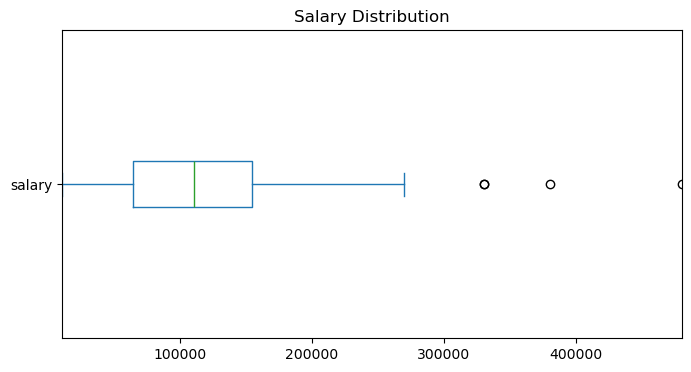

In [301]:
# Plot boxplot for 'salary'
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution")
plt.xlim(df["salary"].min(),df["salary"].max())
plt.show()

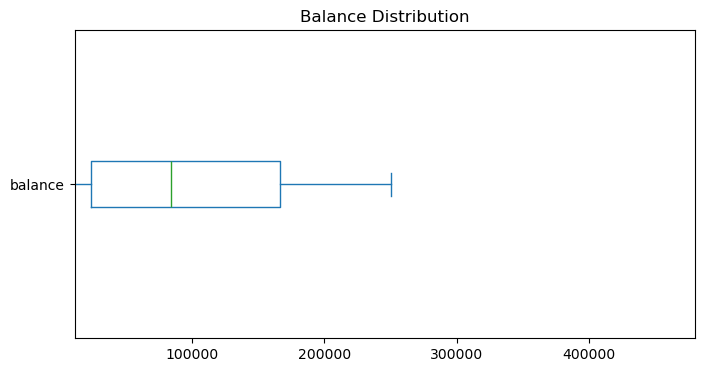

In [302]:
# Plot boxplot for 'balance'
plt.figure(figsize=(8, 4))
df["balance"].plot(kind="box", vert=False)
plt.title("Balance Distribution")
plt.xlim(df["salary"].min(),df["salary"].max())
plt.show()

In [303]:
# Identify and count outliers in salary using IQR method
# Calculate IQR for Salary
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)
IQR=Q3-Q1
# Define outlier thresholds
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
# Identify outliers
salary_outliers = df[(df["salary"] < lower_bound) | (df["salary"] > upper_bound)]

# print("Outlier Customers Based on Salary:")
# print(salary_outliers[["salary"]])

outlier_count = ((df["salary"] < lower_bound) | (df["salary"] > upper_bound)).sum()
print("Count of Outlier Customers Based on Salary:", outlier_count)

Count of Outlier Customers Based on Salary: 4


In [304]:
# Cap salary outliers at the upper bound
df["salary"] = np.where(df["salary"] > upper_bound, upper_bound, df["salary"])
df["salary"] = np.where(df["salary"] < lower_bound, lower_bound, df["salary"])

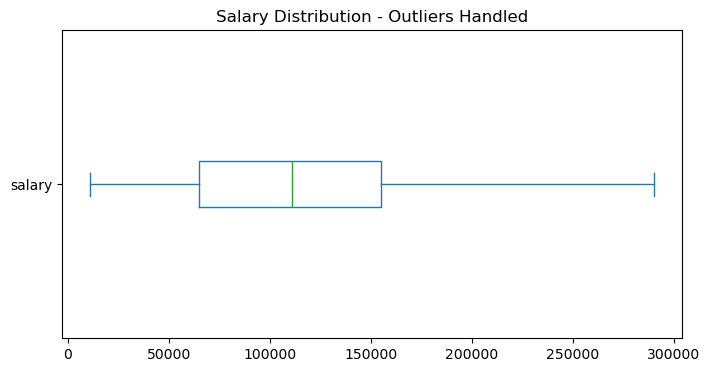

In [305]:
# Plot Salary distribution after handling outiers
plt.figure(figsize=(8, 4))
df["salary"].plot(kind="box", vert=False)
plt.title("Salary Distribution - Outliers Handled")
plt.show()

In [306]:
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel'],
      dtype='object')

In [307]:
# Calculate Basic Summary Statistics
# Compute the mean and median for key numeric columns: Salary , Balance and Credit Score
# Print the results for interpretation.

mean_salary=round(df['salary'].mean())
median_salary=round(df['salary'].median())

mean_balance=round(df['balance'].mean(),2)
median_balance=round(df['balance'].median())

mean_credit_score=round(df['credit_score'].mean())
median_credit_score=round(df['credit_score'].median())

print(f'Mean salary:{mean_salary}, Median salary:{median_salary}')
print(f'Mean balance:{mean_balance}, Median balance:{median_balance}')
print(f'Mean creditscore:{mean_credit_score}, Median creditscore:{median_credit_score}')

Mean salary:110152, Median salary:111000
Mean balance:96957.79, Median balance:84081
Mean creditscore:670, Median creditscore:683


In [308]:
# Understand Categorical Variables
# Count and display how many customers fall into each category of: Gender, Card Type, HasLoan, HasFD

# Count of each category
gender_count = df["gender"].value_counts()
card_type_count = df["card_type"].value_counts()
loan_status_count = df["hasloan"].value_counts()
fd_status_count = df["hasfd"].value_counts()

# Display results
print("Gender Distribution:\n", gender_count)
print("\nCard Type Distribution:\n", card_type_count)
print("\nLoan Status Distribution:\n", loan_status_count)
print("\nFixed Deposit Status Distribution:\n", fd_status_count)

Gender Distribution:
 gender
Male      9028
Female    5965
Name: count, dtype: int64

Card Type Distribution:
 card_type
SILVER            4366
GOLD              4033
PLATINUM          3398
NOT APPLICABLE    3196
Name: count, dtype: int64

Loan Status Distribution:
 hasloan
0    11520
1     3473
Name: count, dtype: int64

Fixed Deposit Status Distribution:
 hasfd
0    8355
1    6638
Name: count, dtype: int64


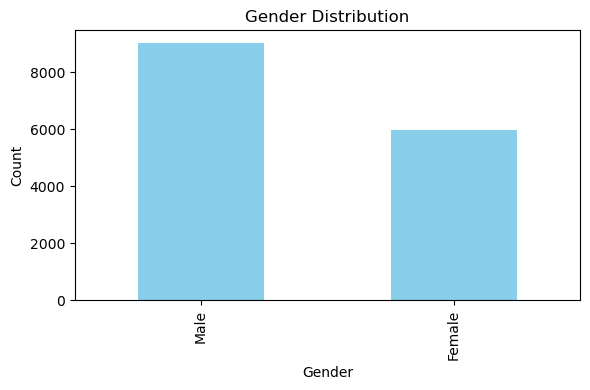

In [309]:
import matplotlib.pyplot as plt

# Plot gender distribution
import matplotlib.pyplot as plt

# Plot gender distribution
plt.figure(figsize=(6, 4))
gender_count.plot(kind='bar',color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

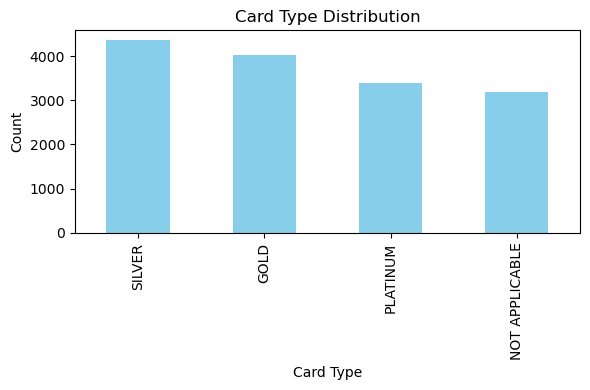

In [310]:
import matplotlib.pyplot as plt

# Plot gender distribution
plt.figure(figsize=(6, 4))
card_type_count.plot(kind='bar',color='skyblue')
plt.title("Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

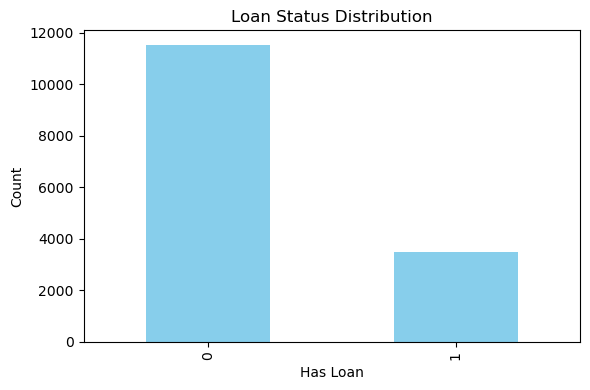

In [311]:
plt.figure(figsize=(6, 4))
loan_status_count.plot(kind='bar',color='skyblue')
plt.title("Loan Status Distribution")
plt.xlabel("Has Loan")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

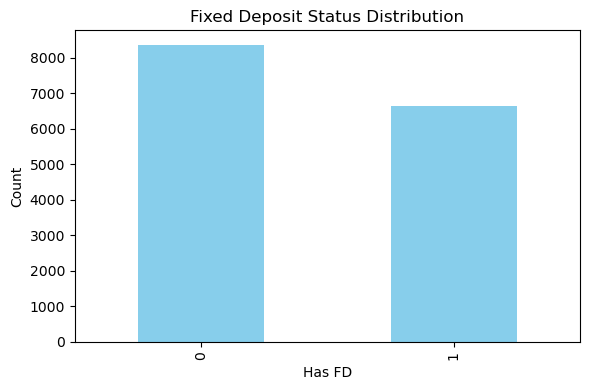

In [312]:
plt.figure(figsize=(6, 4))
fd_status_count.plot(kind='bar',color='skyblue')
plt.title("Fixed Deposit Status Distribution")
plt.xlabel("Has FD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

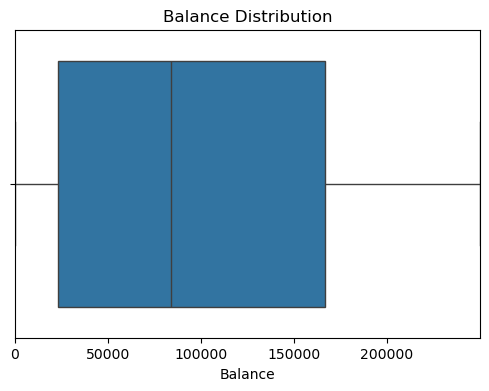

In [313]:
# Create a boxplot for the Balance column to detect outliers and understand spread.

import matplotlib.pyplot as plt
import seaborn as sns

# Balance using boxplots
plt.figure(figsize=(6,4))
sns.boxplot(x=df["balance"])
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.xlim(df["balance"].min(),df["balance"].max())
plt.show()


#### Feature Engineering

In [314]:
# Debt-to-Income Ratio
#  Formula: (Balance + (HasLoan × Salary × 0.3)) / Salary
df["Debt-to-Income Ratio"] = (df["balance"] + (df["hasloan"] * df["salary"] * 0.3)) / df["salary"]

print(df[["first_name", "Debt-to-Income Ratio"]].tail())

      first_name  Debt-to-Income Ratio
14994    Anirudh              1.267763
14995     Sanjay              0.233106
14996     Kavita              0.526083
14997    Anirudh              0.695548
14998      Arjun              1.446423


In [315]:
# Create new column calculating Loyalty Score
# Formula: (Tenure × Satisfaction Score) / (1 + Count of Complains)

df["loyalty_score"] = (df["tenure"] * df["satisfaction_score"]) / (1 + df["count_of_complains"])

df["loyalty_score"] 

0        20.000000
1        80.000000
2        30.000000
3        28.000000
4         8.000000
           ...    
14994     5.555556
14995    48.000000
14996     2.500000
14997    14.000000
14998    45.000000
Name: loyalty_score, Length: 14993, dtype: float64

#### Anayze complaints By State

In [316]:
df["state_avg_complaints"] = df.groupby("state")["count_of_complains"].transform("mean")
df["state_avg_complaints"]

0        4.235927
1        4.297710
2        4.235927
3        4.297710
4        4.317580
           ...   
14994    4.235927
14995    4.297710
14996    4.297710
14997    4.235927
14998    4.055290
Name: state_avg_complaints, Length: 14993, dtype: float64

In [317]:
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel', 'Debt-to-Income Ratio', 'loyalty_score',
       'state_avg_complaints'],
      dtype='object')

In [318]:
# For each customer, compare their complaint count to their state’s average.
# Create a flag called High Complainer:
# 1 if their complaints are above the state average
# 0 otherwise
df["above_state_avg_complaints"] = df["count_of_complains"] > df["state_avg_complaints"]

df["high_complainer"] = df["above_state_avg_complaints"].astype(int)

#### univariate analysis

Salary Category
Very High        4180
High             4154
Medium           4070
Low              2583
Above 2 Lakhs       6
Name: count, dtype: int64


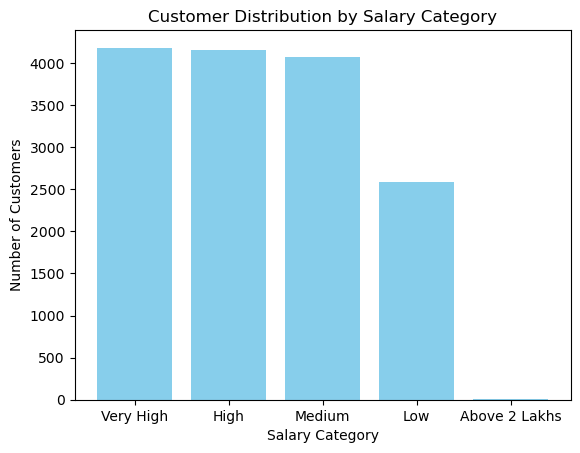

In [319]:
# Create a new column called Salary Category with the following buckets:
# Low (≤ 50,000)
# Medium (50,001 – 100,000)
# High (100,001 – 150,000)
# Very High (150,001 – 200,000)
# Above 2 Lakhs (> 200,000)
df["Salary Category"] = np.where(df["salary"] <= 50000, "Low",
np.where(df["salary"] <= 100000, "Medium",
np.where(df["salary"] <= 150000, "High",
np.where(df["salary"] <= 200000, "Very High", "Above 2 Lakhs"))))

# Count customers in each category
salary_counts = df["Salary Category"].value_counts()

# series datatype
print(salary_counts)

# Plot salary distribution
# Here, index indicates the labels and values indicate total no of customers that fall into that label
plt.bar(salary_counts.index, salary_counts.values, color="skyblue")
plt.xlabel("Salary Category")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Salary Category")
plt.show()

#### Bivariate analysis

In [320]:
# Calculate Average Number of Products Based on Customer Tenure

tenure_product_analysis = df.groupby("tenure")["num_of_products"].mean()
# Display results
print("Average Number of Products Based on Customer Tenure:")
print(tenure_product_analysis)

Average Number of Products Based on Customer Tenure:
tenure
1     1.433551
2     1.444779
3     1.437894
4     1.476880
5     1.495677
6     1.490417
7     1.368132
8     1.481707
9     1.511556
10    1.514377
Name: num_of_products, dtype: float64


#### Multivariate analysis

               salary  num_of_products
exited                                
0       115263.672522         1.509778
1        89064.273504         1.260171


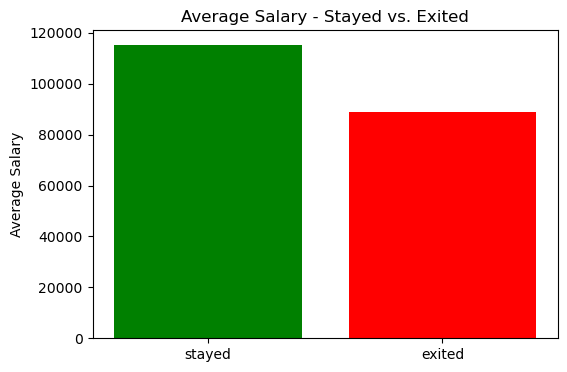

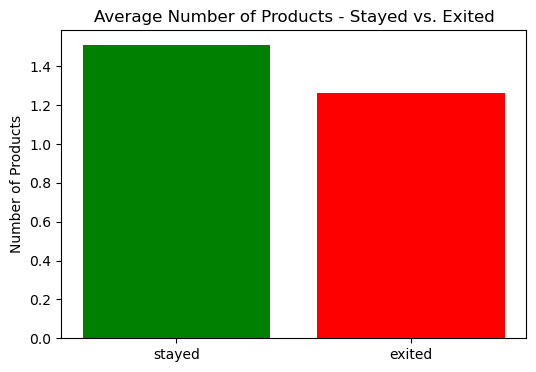

In [321]:
# Grouping by churn status to analyze salary and product usage
churn_analysis = df.groupby("exited")[["salary", "num_of_products"]].mean()
print(churn_analysis)
plt.figure(figsize=(6, 4))
plt.bar(["stayed", "exited"], churn_analysis["salary"], color=["green", "red"])
plt.title("Average Salary - Stayed vs. Exited")
plt.ylabel("Average Salary")
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(["stayed", "exited"], churn_analysis["num_of_products"], color=["green", "red"])
plt.title("Average Number of Products - Stayed vs. Exited")
plt.ylabel("Number of Products")
plt.show()

### Demographic Analysis

Demographic factors are measurable characteristics of a population, typically used to segment and understand customers better.
Without understanding these factors, companies may:
- Offer generic solutions that don’t resonate with specific customer segments.
- Miss out on early signs of churn in high-risk groups.
- Fail to optimize marketing campaigns for the right audiences.


In [322]:
df["card_type"] = df["card_type"].str.upper().str.strip()
df['card_type'].unique()

array(['SILVER', 'GOLD', 'PLATINUM', 'NOT APPLICABLE'], dtype=object)

#### 1.Visualize customers by churn status

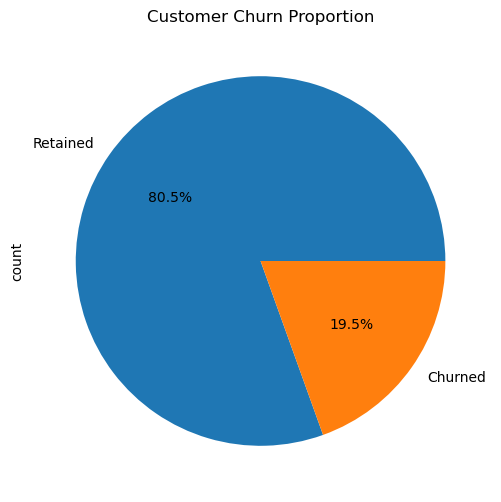

In [323]:
churn_counts = df['exited'].value_counts()
labels = ['Retained', 'Churned']
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Proportion')
plt.show()

#### 2.Churn variation across states

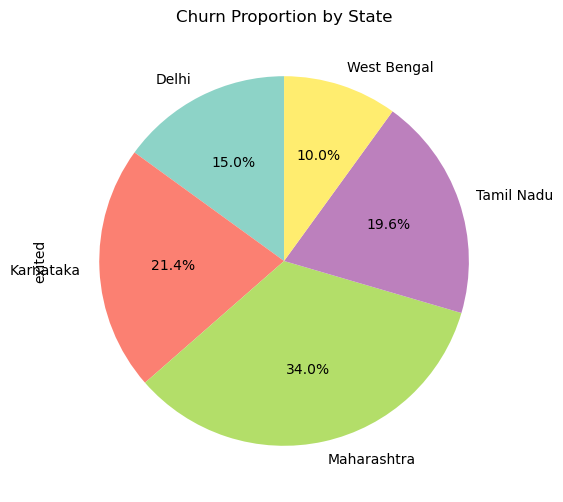

In [324]:
region_grouped = df.groupby('state')
region_exited = region_grouped['exited']
region_churn_counts = region_exited.sum()
plt.figure(figsize=(8, 6))
region_churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Churn Proportion by State')
plt.show()

#### 3.Visualize age vs exit status

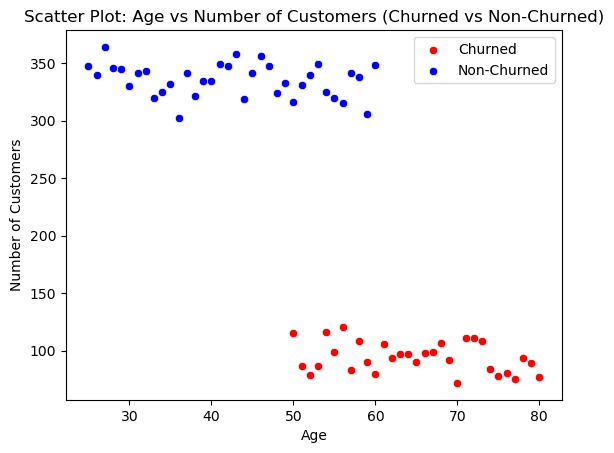

In [325]:
churned_count = df[df['exited'] == 1].groupby('age').size()
non_churned_count = df[df['exited'] == 0].groupby('age').size()
sns.scatterplot(x=churned_count.index, y=churned_count.values, color='red', label='Churned')
sns.scatterplot(x=non_churned_count.index, y=non_churned_count.values, color='blue', label='Non-Churned')
plt.title("Scatter Plot: Age vs Number of Customers (Churned vs Non-Churned)")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

#### 4.Visualize age-distribution and exit status

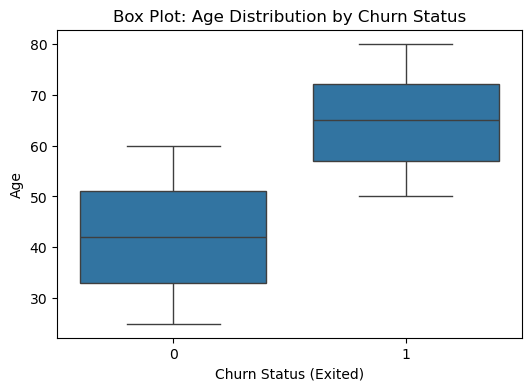

In [326]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='exited', y='age', data=df)
plt.title("Box Plot: Age Distribution by Churn Status")
plt.xlabel("Churn Status (Exited)")
plt.ylabel("Age")
plt.show()

#### 5.Visualize gender and exit status

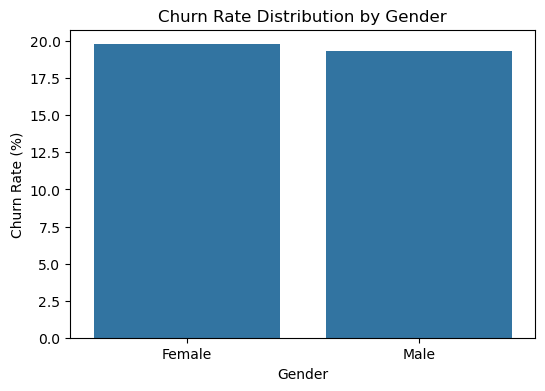

In [327]:
churned_customers_df = df[df['exited'] == 1]
total_customers_by_gender = df.groupby('gender')['exited'].count()
churned_customers_by_gender = churned_customers_df.groupby('gender')['exited'].count()
churn_rate_by_gender = (churned_customers_by_gender / total_customers_by_gender) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values)
plt.title("Churn Rate Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()


#### 6.Churn Rate by Region and Gender

<Figure size 1200x600 with 0 Axes>

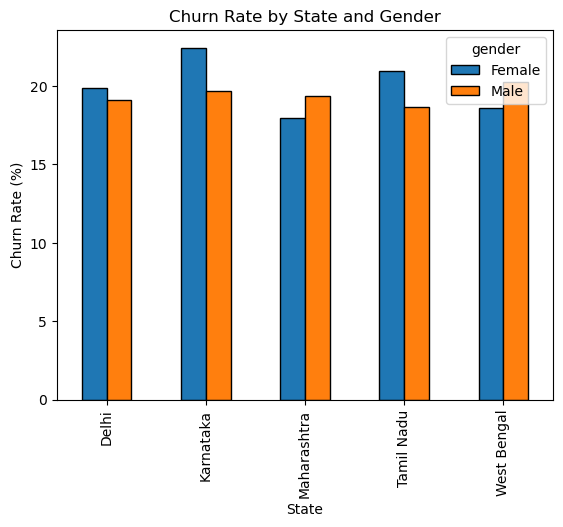

In [328]:
# Step 1: Group data by state and gender
grouped_data = df.groupby(['state', 'gender'])

# Step 2: Count total customers for each group
total_customers = grouped_data['exited'].count()

# Step 3: Count churned customers for each group
churned_customers = grouped_data['exited'].sum()  # Since 'exited' is 1 for churned customers

# Step 4: Calculate churn rate manually
churn_rate = (churned_customers / total_customers) * 100

churn_rate_unstacked = churn_rate.unstack()

# Step 5: Plot a bar chart 
plt.figure(figsize=(12, 6))

churn_rate_unstacked.plot(kind='bar', edgecolor='black')

# Step 6: Customize the plot
plt.title('Churn Rate by State and Gender')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()

### Product Analysis

Why product analysis is important?

- Bank wants to understand why some of its customers are leaving. 
- They suspect that customers who use fewer products (like credit cards, loans, or savings accounts) are more likely to churn.
- They aim to identify which products are most linked to churn to create targeted retention strategies

Eg: A customer using both a credit card and a loan might be more likely to stay because they have multiple touchpoints with the bank.

#### 1.Credit card distribution among churned customers

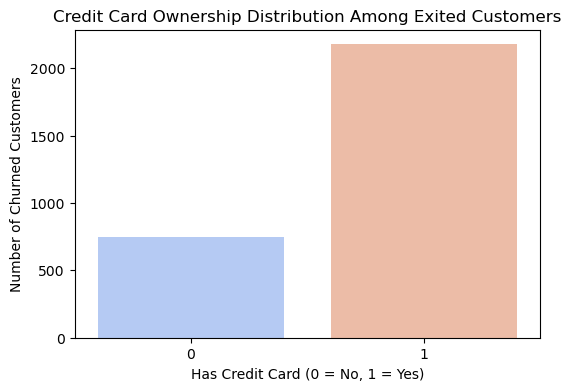

In [329]:
exited_customers = df[df['exited'] == 1]

# Create a count plot for credit card ownership among exited customers
plt.figure(figsize=(6, 4))
sns.countplot(
    data=exited_customers,
    x="hascrcard",
    hue="hascrcard",          # ✅ add hue to avoid FutureWarning
    palette="coolwarm",
    legend=False              # ✅ disable redundant legend
)
plt.title("Credit Card Ownership Distribution Among Exited Customers")
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Number of Churned Customers")
plt.show()


In [330]:
df.columns

Index(['row_number', 'customer_id', 'first_name', 'state', 'gender', 'age',
       'salary', 'credit_score', 'tenure', 'balance', 'hascrcard', 'card_type',
       'hasloan', 'hasfd', 'num_of_products', 'isactivemember', 'exited',
       'complain', 'count_of_complains', 'satisfaction_score', 'point_earned',
       'preferred_channel', 'Debt-to-Income Ratio', 'loyalty_score',
       'state_avg_complaints', 'above_state_avg_complaints', 'high_complainer',
       'Salary Category'],
      dtype='object')

#### 2.Global Customer Churn Percentage by Credit Card Status

   hascrcard  exited  count
0          0       0   2451
1          0       1    747
2          1       0   9617
3          1       1   2178
14993


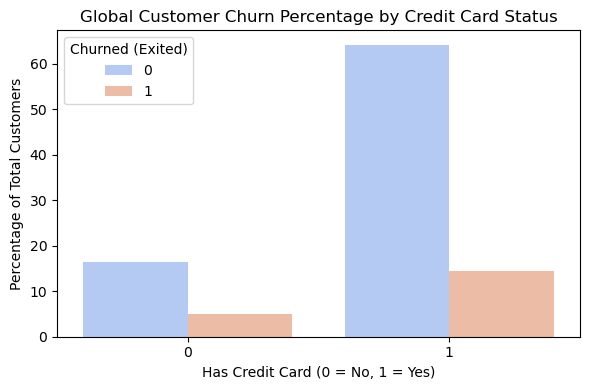

In [331]:
group_counts = df.groupby(['hascrcard', 'exited']).size().reset_index(name='count')

print(group_counts)

# Step 2: Calculate total number of customers
total_customers = group_counts['count'].sum()
#
print(total_customers)

# Step 3: Calculate percentage as (group count / total count) * 100
group_counts['percentage'] = (group_counts['count'] / total_customers) * 100

# Step 4: Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(data=group_counts, x='hascrcard', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

# Enhancing the plot
plt.title('Global Customer Churn Percentage by Credit Card Status')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Total Customers')
plt.legend(title='Churned (Exited)')
plt.tight_layout()
plt.show()

#### 3.Credit card type distribution across churn status

        card_type  exited  count  percentage
0            GOLD       0   3810       25.41
1            GOLD       1    223        1.49
2  NOT APPLICABLE       0   2450       16.34
3  NOT APPLICABLE       1    746        4.98
4        PLATINUM       0   2423       16.16
5        PLATINUM       1    975        6.50
6          SILVER       0   3385       22.58
7          SILVER       1    981        6.54


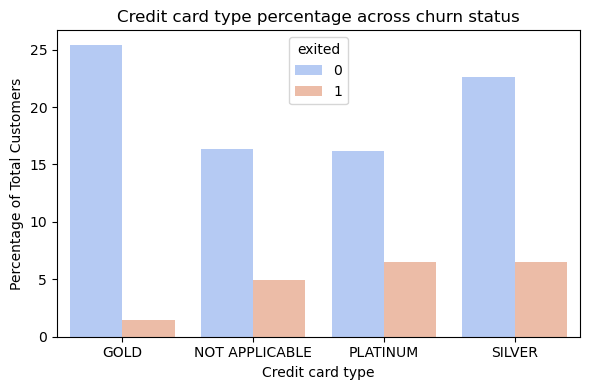

In [332]:
card_counts = df.groupby(['card_type', 'exited']).size().reset_index(name='count')

# Step 2: Calculate total number of customers
total_customers = card_counts['count'].sum()

# Step 3: Calculate percentage as (group count / total count) * 100 and round
card_counts['percentage'] = ((card_counts['count'] / total_customers) * 100).round(2)

print(card_counts)

# Step 4: Plot using Seaborn
plt.figure(figsize=(6,4))
sns.barplot(data=card_counts, x='card_type', y='percentage', hue='exited', palette="coolwarm", errorbar=None)

# Enhancing the plot
plt.title('Credit card type percentage across churn status')
plt.xlabel('Credit card type')
plt.ylabel('Percentage of Total Customers')
plt.tight_layout()
plt.show()

####  4.Loan ownership vs Churn

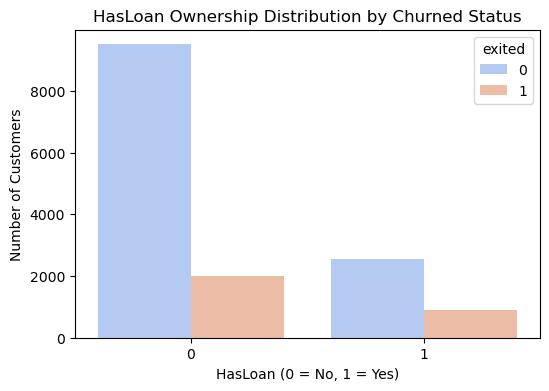

In [333]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["hasloan"], hue=df["exited"], palette="coolwarm")
plt.title("HasLoan Ownership Distribution by Churned Status")
plt.xlabel("HasLoan (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

#### 5.Number of products vs churn

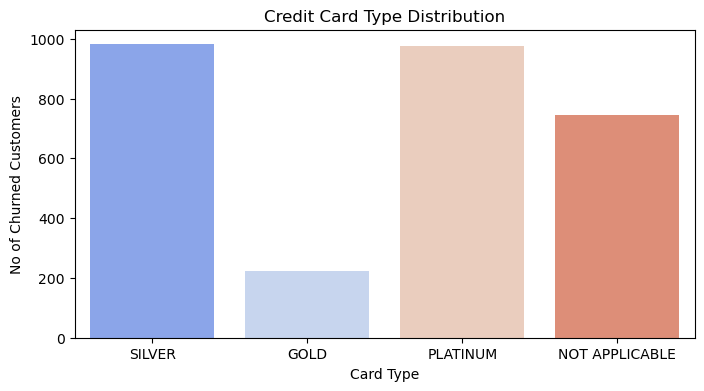

In [334]:
exited_customers = df[df['exited'] == 1]

# 2. Create a count plot to visualize the distribution of credit card types among exited customers.
plt.figure(figsize=(8, 4))
sns.countplot(
    data=exited_customers,
    x="card_type",
    hue="card_type",      # ✅ add hue to align with Seaborn 0.14+ updates
    palette="coolwarm",
    legend=False          # ✅ disables redundant legend
)

# 3–5. Add titles and labels
plt.title("Credit Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("No of Churned Customers")
plt.show()

#### 6. Product distribution across churn

Credit card: 
exited
0    9617
1    2178
dtype: int64
Loan count: 
exited
0    2564
1     909
dtype: int64
HasLoan count: 
exited
0    6039
1     599
dtype: int64


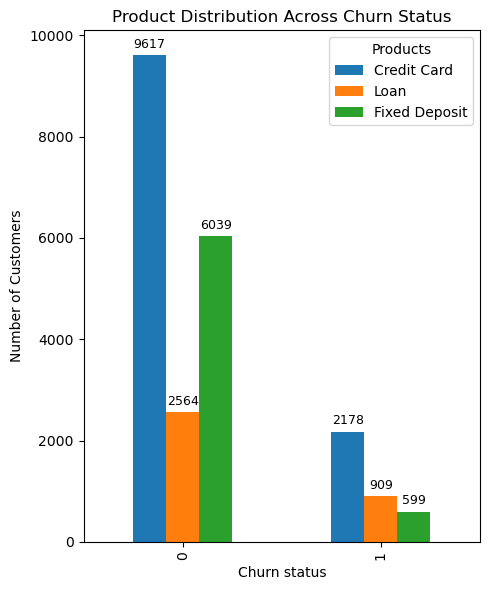

In [335]:
crcard = df[df['hascrcard'] == 1].groupby('exited').size()
print("Credit card: ")
print(crcard)

loan = df[df['hasloan'] == 1].groupby('exited').size()
print("Loan count: ")
print(loan)

fd = df[df['hasfd'] == 1].groupby('exited').size()
print("HasLoan count: ")
print(fd)

# Step 2: Combine into a DataFrame
product_dist = pd.DataFrame({
    'Credit Card': crcard,
    'Loan': loan,
    'Fixed Deposit': fd
}) 

# Step 1: Plot the bar chart
ax = product_dist.plot(kind='bar', figsize=(5, 6))

# Step 2: Automatically label bars
ax.bar_label(ax.containers[0], fontsize=9, padding=3)
ax.bar_label(ax.containers[1], fontsize=9, padding=3)
ax.bar_label(ax.containers[2], fontsize=9, padding=3)


plt.title('Product Distribution Across Churn Status')
plt.xlabel('Churn status')
plt.ylabel('Number of Customers')
plt.legend(title='Products')
plt.tight_layout()
plt.show()

### Feedback Analysis

#### Assumption 1:
Customers with low satisfaction and low loyalty points are more likely to churn.

Approach:

You're plotting two continuous variables: satisfaction_score and point_earned.
A scatter plot helps detect relationships, clusters, or patterns between these two variables.
Coloring by churn_status adds a third visual dimension — allowing us to visually detect trends in churn behavior based on combinations of satisfaction and rewards.

In [336]:
# Map 'exited' column to categorical labels
df["churn_status"] = df["exited"].map({0: "Stayed", 1: "Left"})



#### **How `.map()` Works (with Example)**

Let’s break it down with your line:

```python
df["churn_status"] = df["exited"].map({0: "Stayed", 1: "Left"})
```

#### What it does:
- `df["exited"]` is a column with numeric values: `0` (not churned), `1` (churned)
- `.map({0: "Stayed", 1: "Left"})` **replaces**:
  - `0` → `"Stayed"`
  - `1` → `"Left"`
- The result is a new column `churn_status` with more readable labels



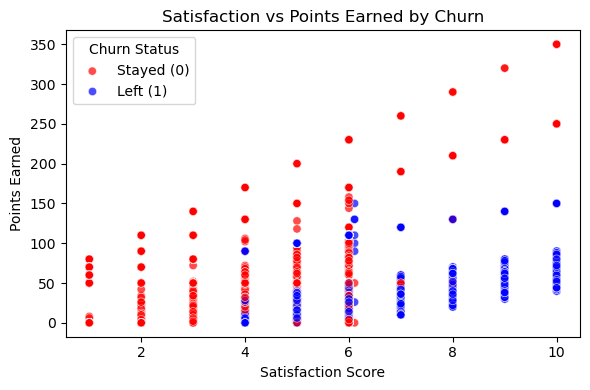

In [337]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='satisfaction_score',
    y='point_earned',
    hue='exited',
    palette={0: 'blue', 1: 'red'},
    alpha=0.7
)
plt.title("Satisfaction vs Points Earned by Churn")
plt.xlabel("Satisfaction Score")
plt.ylabel("Points Earned")
plt.legend(title="Churn Status", labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()

### Assumption 2:
Customers who churn tend to have lower satisfaction scores than those who stay.


Approach:
- Compare the distribution of satisfaction_score for churned vs non-churned customers.
- Plot both on the same axis for visual comparison.

📊 Why this chart?
- A histogram shows how a variable is spread out.
- When overlaid, we can spot shifts in the score distribution between groups.

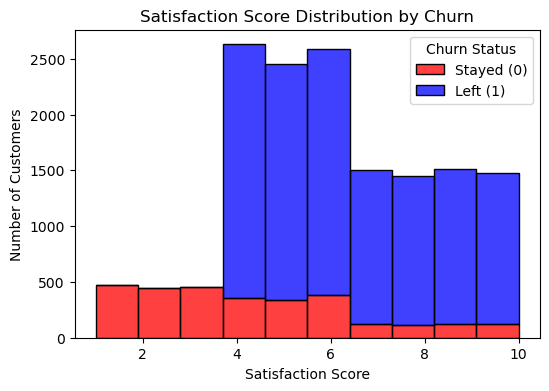

In [338]:
plt.figure(figsize=(6,4))

sns.histplot(
    data=df,
    x='satisfaction_score',
    hue='exited',          # churn status
    bins=10,
    multiple='stack',      # stack churn categories
    palette={0: 'blue', 1: 'red'}
)

plt.title('Satisfaction Score Distribution by Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Left (1)'])

### Assumption 3
- Churn rate differs between FD holders and non-holders

Approach:
- Filter the dataset to include only FD holders (hasfd == 1).
- Use value_counts(normalize=True) gives percentage proportions of churned vs. non-churned customers among FD holders.
- Plot pie chart to show part-to-whole relationships.


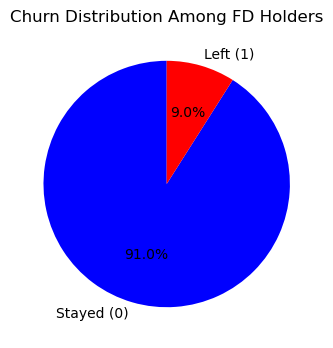

In [339]:
fd_holders = df[df['hasfd'] == 1]
churn_dist = fd_holders['exited'].value_counts(normalize=True).round(2) * 100
plt.figure(figsize=(6,4))
plt.pie(
    churn_dist,
    labels=['Stayed (0)', 'Left (1)'],
    autopct='%1.1f%%',
    colors=['blue', 'red'],
    startangle=90
)
plt.title('Churn Distribution Among FD Holders')
plt.show()
